# Data Exploration

Summary:  
- I find the total missing numbers for each column. I find there is a common total missing number 9419 appearing at several columns. After exploration, I know that these 9419 rows contain nearly nothing in most columns so I decided to remove these 9419 rows.
- I explore the activity of users in the website through event analysis. Through funnel analysis, I find the user don't like introduction video much. Besides, I also find verification process has about 33% failure. The majority reason is the invalid cell-phone number format. It is necessary to redesign the cell-phone entry. Or I advice to use email for verification.
- I define conversion as successfully sign-up users. The dataset in based on records, which means one user can have several records. Here I transfer/rebuild data set based on users. The conversion rate is about 3.9%。 Besides, I notice there are eight users sign-up successfully more than once with different information but I can't figure out reasons that they do so. 
- I explore the sign-up user sources. They are mostly referred from search engines.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv('sensor_raw_data.csv', sep='\t')
raw_data.head(5)

/Users/LiangTan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,43,45,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nocache,distinct_id,event,jssdk_error,time,type,lib_lib,lib_method,lib_version,browser,...,project_name,referrHostUrl,referrerUrl,requestBtn,result,session_page_url,siteUrl,site_url,url_path.1,verification_code
0,654392402996,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,NaN,1488791047953,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,NaN,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,NaN,NaN,NaN
1,3040562711955,9939d3e087bca29c42334d96dccd25ca0e06652a,NaN,NaN,1490958296645,profile_set_once,js,code,1.6.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,NaN,1488791050856,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,NaN,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN
3,652937076129,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,1488791051772,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,2.0,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN
4,8207407748558,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,1488791056032,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,2.0,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN


In [4]:
print('%25s %25s %25s' % ('Feature name', 'Unique element number', 'Missing value number'))
for col in raw_data.columns:
    print('%25s %24d  %24d' % \
          (col, len(raw_data[col].unique()), raw_data[col].isnull().sum()))

             Feature name     Unique element number      Missing value number
                  nocache                    75065                         0
              distinct_id                    11756                         0
                    event                       13                      9419
              jssdk_error                        2                     75034
                     time                    73113                         0
                     type                        2                         0
                  lib_lib                        1                         0
               lib_method                        1                         0
              lib_version                        1                         0
                  browser                       24                      9419
          browser_version                      124                      9419
   first_browser_language                       22                     6594

#### 1. Is 9419 a coincidence？
I observe that 'event', 'browser', 'browser_version', 'ip', 'is_first_day', 'is_first_time', 'property_lib', 'property_lib_version', 'model', 'os', 'os_version', 'screen_height' and 'screen_width' have the same number of missing value 9419. I wonder whether 9419 rows are totally empty. So my first question would be "What happens to those 9419 rows?"  

In [5]:
null_9419_col = ['event', 'browser', 'browser_version', 'ip', 'is_first_day', 'is_first_time', \
                 'property_lib', 'property_lib_version', 'model', 'os', 'os_version', \
                 'screen_height', 'screen_width']
mask = raw_data['event'].isnull()
raw_data_masked = raw_data[:][mask]
raw_data_masked.head(5)

,nocache,distinct_id,event,jssdk_error,time,type,lib_lib,lib_method,lib_version,browser,...,project_name,referrHostUrl,referrerUrl,requestBtn,result,session_page_url,siteUrl,site_url,url_path.1,verification_code
1,3040562711955,9939d3e087bca29c42334d96dccd25ca0e06652a,NaN,NaN,1490958296645,profile_set_once,js,code,1.6.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,8649012581445,ac2b15e51b9d22b6b46782fbde206657db0c1a26,NaN,NaN,1490958296689,profile_set_once,js,code,1.6.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,84255947731,5d85e42af6e819a53c9169fed4b909fe0f1613f2,NaN,NaN,1490958296714,profile_set_once,js,code,1.6.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2542191017419,9681c29a2e228b78395495cde247f93c76d0c17a,NaN,NaN,1490958296717,profile_set_once,js,code,1.6.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2828728076998,91f49ce17152389fc9d94df066f595ff892e8a88,NaN,NaN,1490958296746,profile_set_once,js,code,1.6.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print('%25s %25s' % ('Feature name', 'Missing value number'))
for col in raw_data_masked.columns:
    print('%25s %24d' % \
          (col, raw_data_masked[col].isnull().sum()))

             Feature name      Missing value number
                  nocache                        0
              distinct_id                        0
                    event                     9419
              jssdk_error                     9397
                     time                        0
                     type                        0
                  lib_lib                        0
               lib_method                        0
              lib_version                        0
                  browser                     9419
          browser_version                     9419
   first_browser_language                      271
           first_referrer                     2687
      first_referrer_host                     2687
         first_visit_time                        0
                       ip                     9419
             is_first_day                     9419
            is_first_time                     9419
          latest_referrer     

I can see that records within the 9419 rows shows NaN for other columns as well.  Except for some basic information ('distinct_id', 'nocache', 'type', 'lib_lib', 'lib_method' and 'lib_version), these records can't give any information about user behavior. UTM related information can only give me the source where these users come from. I assume that the website meets some problems so that it can't records any information. Therefore, I decided to delete these 9419 records.

In [7]:
raw_data = raw_data[:][~mask]
raw_data.shape

(65673, 70)

In [8]:
print('%25s %25s %25s' % ('Feature name', 'Unique element number', 'Missing value number'))
for col in raw_data.columns:
    print('%25s %24d  %24d' % \
          (col, len(raw_data[col].unique()), raw_data[col].isnull().sum()))

             Feature name     Unique element number      Missing value number
                  nocache                    65659                         0
              distinct_id                    11708                         0
                    event                       12                         0
              jssdk_error                        2                     65637
                     time                    65169                         0
                     type                        1                         0
                  lib_lib                        1                         0
               lib_method                        1                         0
              lib_version                        1                         0
                  browser                       23                         0
          browser_version                      123                         0
   first_browser_language                        1                     6567

Now I have 65673 records in total. I noticed that 'first_browser_language', 'first_referrer', 'first_referrer_host' and 'first_visit_time' have 65673 missing values. Thus, I will delete these features from my filtered data set.

In [9]:
raw_data = raw_data.drop(['first_browser_language'], axis=1)
raw_data = raw_data.drop(['first_referrer'], axis=1)
raw_data = raw_data.drop(['first_referrer_host'], axis=1)
raw_data = raw_data.drop(['first_visit_time'], axis=1)
raw_data.shape

(65673, 66)

#### 2. How active are the user in this week?
Here I will used the dataset I get from previous treatment. I want to explore the interactions between users and website.

In [10]:
event_table = raw_data['event'].value_counts(dropna = False)
print(event_table)

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64


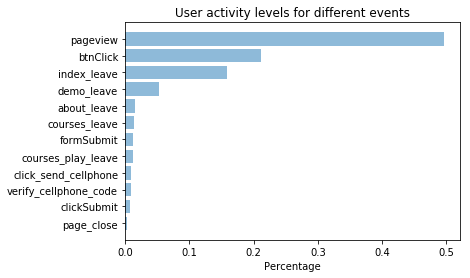

In [11]:
objects = list(event_table.index)
objects[0] = 'pageview'
y_pos = np.arange(len(objects))
percentage = list(event_table/65673)
plt.barh(y_pos, percentage, align='center', alpha = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Percentage')
plt.title('User activity levels for different events')
plt.gca().invert_yaxis()


Based on the events distribution, I decide to experience the website myself. I find that:      
index_leave: close the home page $\rightarrow$ leave website      
demo_leave: close the demo page $\rightarrow$ not meaning leave the website (the homepage is still on)      
about_leave: close the about page $\rightarrow$ leave website (when I click the about page, the home page will transfer to about page. It will not open a new tab (like demo visit) for me. Thus, I can take about_leave the same as index_leave.)     
course_leave: close the video page $\rightarrow$ not meaning leave the website (the homepage is still on).     
courses_play_leave: play the video then close video page $\rightarrow$ not meaning leave the website (the homepage is still on).   
click_send_cellphone: user need get verify code before trying demo $\rightarrow$ user wants to try demo.            
verify_cellphone_code: users give their cellphone to get code $\rightarrow$ user wants to try demo.      
click_submit: users share their personal information to get demo $\rightarrow$ user can try demo.


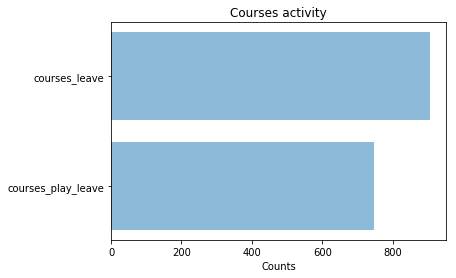

In [12]:
course_index = [5,7]
objects = list(event_table.index[i] for i in course_index)
y_pos = np.arange(len(objects))
percentage = list(event_table[i] for i in course_index)
plt.barh(y_pos, percentage, align='center', alpha = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Counts')
plt.title('Courses activity')
plt.gca().invert_yaxis()
 

About 900 times (over 50%), users open the video but refuse to play it. 

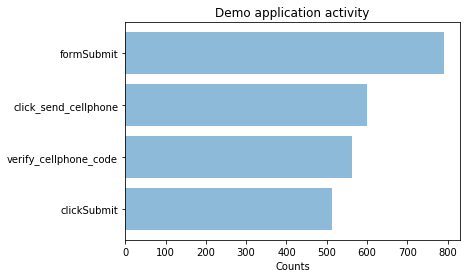

In [14]:
course_index = [6,8,9,10]
objects = list(event_table.index[i] for i in course_index)
y_pos = np.arange(len(objects))
percentage = list(event_table[i] for i in course_index)
plt.barh(y_pos, percentage, align='center', alpha = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Counts')
plt.title('Demo application activity')
plt.gca().invert_yaxis()

The application flow is like this:      
enter cell phone number $\rightarrow$ get and enter code $\rightarrow$ enter personal information $\rightarrow$ submit 

However, I am confused about formSubmit and clickSubmit. So I checked the explanation file. It is said clickSubmit is actived only when form is verified. formSubmit is actived only when form is successful in the back end or form is rejected due to verification failure. Therefore, I can check 'isSuccess' feature to tell successSubmit and failureSubmit.


In [15]:
raw_data['isSuccess'].value_counts(dropna = False)

NaN      64882
True       469
False      322
Name: isSuccess, dtype: int64

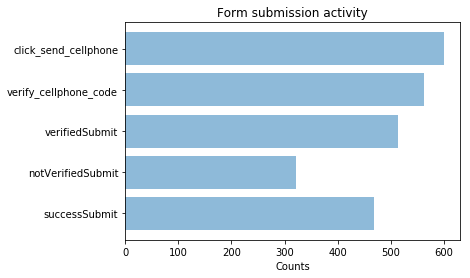

In [16]:
objects = list(['click_send_cellphone', 'verify_cellphone_code', 'verifiedSubmit',\
                'notVerifiedSubmit', 'successSubmit'])
y_pos = np.arange(len(objects))
percentage = list([event_table[8], event_table[9], event_table[10], \
                   raw_data['isSuccess'].value_counts(dropna = False)[0], \
                   raw_data['isSuccess'].value_counts(dropna = False)[1]])
plt.barh(y_pos, percentage, align='center', alpha = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Counts')
plt.title('Form submission activity')
plt.gca().invert_yaxis()

verifiedSubmit doesn't equal successSubmit. successSubmit is defined as submission showing success in the backend.

In [17]:
total_sub  = event_table[10] + raw_data['isSuccess'].value_counts(dropna = False)[0]
verified_sub = event_table[10]
success_sub = raw_data['isSuccess'].value_counts(dropna = False)[1]
print('The verified submission rate is %f.' % (round(verified_sub/total_sub, 6)))
print('The successful submission rate is %f.' % (round(success_sub/total_sub, 6)))
print('The successful submission over verified submission rate is %f.' % (round(success_sub/verified_sub, 6)))

The verified submission rate is 0.614371.
The successful submission rate is 0.561677.
The successful submission over verified submission rate is 0.914230.


Though the overall successful submission rate is not high, the successful submission rate is high if the submission passed the verification. What's the reason causing failure of submission?

In [18]:
raw_data[raw_data['isSuccess'] == False][['isSuccess', 'result']][0:5]

,isSuccess,result
362,False,NaN
435,False,NaN
1229,False,NaN
1532,False,NaN
1535,False,NaN


In [19]:
raw_data[raw_data['isSuccess'] == False]['result'].value_counts(dropna = False)

NaN    322
Name: result, dtype: int64

The unverified submission's results are all missing. I can't get any reasons for unverified case directly. Thus, I try to understand the failure distributions.

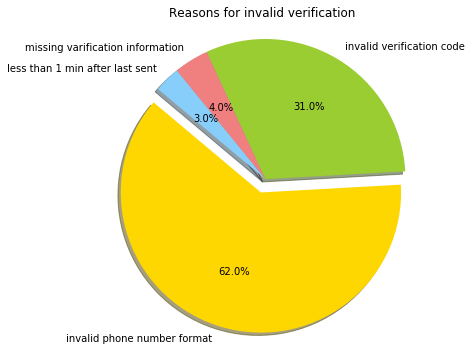

In [20]:
plt.figure(figsize=(6,6))
failure_table = raw_data['result'].value_counts(dropna = False)
objects = ['invalid phone number format', 'invalid verification code', \
           'missing varification information', 'less than 1 min after last sent'] #transfer Chinese into English
sizes = list(failure_table[3:])
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=objects, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Reasons for invalid verification')
plt.show()

We can see the format problem with phone number makes biggest contribution to verification failure. Here is my suggestions: The unsuccessful verification submission takes 39% and invalid phone number format is the major problem. It indicates people may not want to share phone numbers at first. So it is better to use email for sending verification code and ask for phone numbers in the filling for part.

#### 3. How to define conversion rate in this case?
Here I count a successful form submission as one conversion. I want to calculate conversion rate in terms of 'distinct_id' instead of records ('nocache').  

In [21]:
converted_id = raw_data[raw_data['isSuccess'] == True]['distinct_id']
print('The total number of conversion records: %d.' % (len(converted_id)))
print('The total number of conversion id: %d.' % (len(set(converted_id))))
print('The conversion rate is: %f' %(len(set(converted_id)) / len(set(raw_data['distinct_id']))))

The total number of conversion records: 469.
The total number of conversion id: 457.
The conversion rate is: 0.039033


I am confused here bacause conversion records don't equal distinct_id. Does that mean some users submit successful forms more than one time? Why do they do so?

In [22]:
set(converted_id[converted_id.duplicated(keep = 'first')])

{'4327b485593df4cb7c5c5602e35860b52fa990c9',
 '6a0abcb887ebfca8df3825088cc9ebc4ba2afc74',
 '7b0215cb110a50650cb3900532fb859ebdceeb9d',
 '8fd648fb9909652fe0b88394c5e6b130ad99aa95',
 '95cd75560edb05c1a4e097da927a5c8301e6851c',
 'cc03b92cbfeebd715cd97f7f3d0cff31d96322a8',
 'e0da77db8fe93d037c574ff7e6e7aadcdfa62975',
 'e10cdad8e6dee5736d62bef80613c439934a3687'}

Above eight users submit forms successfully more than once. Let me check one example.

In [23]:
raw_data[(raw_data['distinct_id'] == 'e0da77db8fe93d037c574ff7e6e7aadcdfa62975') \
         & (raw_data['isSuccess'] == True)].T

,48968,49894
nocache,6061663947725,7586860730338
distinct_id,e0da77db8fe93d037c574ff7e6e7aadcdfa62975,e0da77db8fe93d037c574ff7e6e7aadcdfa62975
event,formSubmit,formSubmit
jssdk_error,NaN,NaN
time,1489281674546,1489302478513
type,track,track
lib_lib,js,js
lib_method,code,code
lib_version,1.6.20,1.6.20
browser,sogou,sogou


Two records belong to the same person. I don't get the reason they want to submit several times. However, such records is not heavy. 

#### 4. Will the reference source have influence on conversion?
Here I want to explore the reference source to see whether they have an influence.

In [24]:
converted_case = raw_data[raw_data['isSuccess'] == True]
raw_data['latest_utm_source'].value_counts(dropna = False)

baidu                 36085
NaN                   25090
sogou                  1943
sales4c                 441
wechat                  432
google                  393
admin                   374
sanjieke.cn             273
next.36kr.com            68
sunwenliang              65
mulumu.com               57
tianguang                56
liuyaozhou               38
liujinbo1                38
zhihu                    34
gaoxiaoqing              34
hao.caibaojian.com       33
sina                     31
admin10                  22
toutiao.io               20
shenyulong               15
analytics_test           15
guohongyao               11
demo                     11
linhuiyong               10
yupan                     9
email                     9
sunjiaqian                7
qiye.36kr.com             7
zhoushunzhou              4
23h5                      4
hzcaibin                  4
gongxinrong               4
diaopeng                  4
wangcheng                 3
liquantao           

In [25]:
converted_case['latest_utm_source'].value_counts(dropna = False)

baidu          312
NaN            134
sogou           16
wechat           2
sanjieke.cn      1
zhihu            1
tianguang        1
google           1
sales4c          1
Name: latest_utm_source, dtype: int64

I can see that converted users are from nine sources.

In [26]:
raw_data.to_csv('sensor_data_remove_missing.csv', sep='\t', encoding='utf-8', index = False)